# 3. データを前処理する

# 3-1. 訓練データとテストデータへの分類

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
npz = np.load('C:/my_comp_train_XY/my_comp_train_XY.npz')
X_train_raw = npz['X']
y_train_raw = npz['y']

# 3-2. 標準化・データのレンジ

In [3]:
X_train_scaled = X_train_raw/255.
y_train_scaled = y_train_raw.copy()

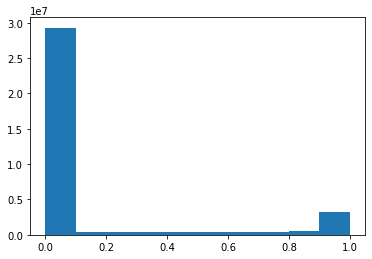

In [4]:
plt.hist(X_train_scaled.ravel())
plt.show()

In [5]:
#訓練データとテストデータに分ける(引数stratify)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_scaled, y_train_scaled,
                                                     shuffle=True, test_size=0.2, stratify=y_train_scaled)

In [6]:
print("Train data shape, X_train.shape:{} y_train.shape:{}".format(X_train.shape, y_train.shape))
print("Valid data shape, X_valid.shape:{} y_valid.shape:{}".format(X_valid.shape, y_valid.shape))

Train data shape, X_train.shape:(36381, 28, 28) y_train.shape:(36381,)
Valid data shape, X_valid.shape:(9096, 28, 28) y_valid.shape:(9096,)


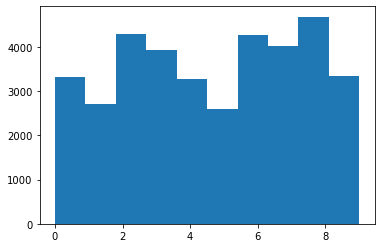

In [7]:
plt.hist(y_train)
plt.show()

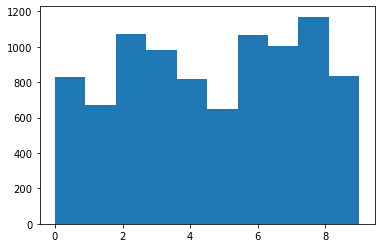

In [8]:
plt.hist(y_valid)
plt.show()

# (i)ロジスティック回帰を用いた場合

# 4. 訓練データでモデルを学習する

# 4-1. モデルの選択

In [9]:
X_train_logireg, X_valid_logireg = X_train.reshape(-1, 28*28), X_valid.reshape(-1, 28*28)
print(X_train_logireg.shape)
print(X_valid_logireg.shape)

(36381, 784)
(9096, 784)


In [10]:
#モデルのインスタンス化(p74参照)
model_logireg = LogisticRegression(verbose=1)

In [11]:
model_logireg.fit(X_train_logireg, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.1s finished


LogisticRegression(verbose=1)

# 5. 精度を評価する

In [12]:
y_logireg_train_predictions = model_logireg.predict(X_train_logireg)
y_logireg_valid_predictions = model_logireg.predict(X_valid_logireg)

accuracy_logireg_train = accuracy_score(y_train, y_logireg_train_predictions)
accuracy_logireg_valid = accuracy_score(y_valid, y_logireg_valid_predictions)

print("Train accuracy", accuracy_logireg_train)
print("Valid accuracy", accuracy_logireg_valid)

Train accuracy 0.938374426211484
Valid accuracy 0.9190853122251539


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [14]:
matrix_logireg_valid = confusion_matrix(y_valid, y_logireg_valid_predictions)

In [15]:
matrix_logireg_valid

array([[ 801,    0,    6,    0,    3,    7,    4,    2,    6,    0],
       [   0,  657,    0,    3,    0,    4,    0,    2,    7,    1],
       [   8,   15,  971,   18,   13,    2,   16,    4,   24,    2],
       [   6,    7,   21,  869,    0,   32,    1,    3,   30,   12],
       [   2,    5,    3,    2,  761,    0,    9,    4,    5,   27],
       [   7,    4,    4,   27,    6,  558,   14,    3,   25,    2],
       [  10,    4,    7,    1,    2,    6, 1026,    3,    6,    0],
       [   1,    3,   11,    3,   14,    1,    1,  940,    6,   23],
       [   5,   20,   14,   22,    6,   30,   11,    3, 1043,   16],
       [   3,    5,    3,    7,   28,    9,    2,   34,    8,  734]],
      dtype=int64)

混同行列…行：実際のクラス、列：予測したクラス→対角の成分が予測が的中した件数

In [16]:
y_valid.shape

(9096,)

In [17]:
y_logireg_valid_predictions.shape

(9096,)

In [22]:
y_logireg_valid_predictions[5018]

4

In [23]:
#適合率
precision_score(y_valid, y_logireg_valid_predictions, average="macro")

0.9168421594074593

In [24]:
#再現率
recall_score(y_valid, y_logireg_valid_predictions, average="macro")

0.9193725577567982

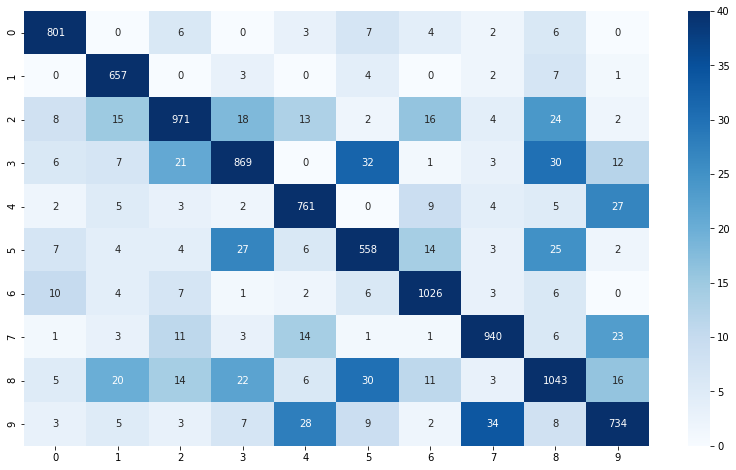

In [25]:
#テストデータy_validが縦軸、予測値y_logireg_valid_predictionsが横軸
plt.figure(figsize=(14, 8))
sns.heatmap(matrix_logireg_valid, annot=True, fmt='g', cmap='Blues', vmin=0, vmax=40)
plt.show()

# (ii)Random Forestを用いた場合

# 4. 訓練データでモデルを学習する

# 4-1. モデルの選択

In [26]:
X_train_rndforest, X_valid_rndforest = X_train.reshape(-1, 28*28), X_valid.reshape(-1, 28*28)
print(X_train_rndforest.shape)
print(X_valid_rndforest.shape)

(36381, 784)
(9096, 784)


In [27]:
model_rndforest = RandomForestClassifier()

In [28]:
model_rndforest.fit(X_train_rndforest, y_train)

RandomForestClassifier()

# 5.精度を評価する

In [29]:
y_rndforest_train_predictions = model_rndforest.predict(X_train_rndforest)
y_rndforest_valid_predictions = model_rndforest.predict(X_valid_rndforest)

accuracy_rndforest_train = accuracy_score(y_train, y_rndforest_train_predictions)
accuracy_rndforest_valid = accuracy_score(y_valid, y_rndforest_valid_predictions)

print("Train accuracy", accuracy_rndforest_train)
print("Valid accuracy", accuracy_rndforest_valid)

Train accuracy 1.0
Valid accuracy 0.9648197009674582


In [30]:
matrix_rndforest_valid = confusion_matrix(y_valid, y_rndforest_valid_predictions)

In [31]:
matrix_rndforest_valid

array([[ 819,    1,    1,    0,    0,    1,    2,    0,    5,    0],
       [   0,  668,    1,    3,    0,    0,    0,    1,    1,    0],
       [   5,    0, 1050,    2,    8,    0,    1,    0,    6,    1],
       [   3,    1,   18,  924,    0,    9,    1,    8,   13,    4],
       [   1,    2,    2,    0,  792,    0,    6,    1,    2,   12],
       [   5,    2,    2,    9,    1,  615,    4,    1,    7,    4],
       [   3,    0,    0,    0,    0,    5, 1052,    0,    5,    0],
       [   1,    1,   15,    1,    9,    0,    0,  965,    3,    8],
       [   1,    5,   11,   10,    6,    6,   10,    0, 1104,   17],
       [   2,    3,    3,    8,   12,    4,    1,    7,    6,  787]],
      dtype=int64)

In [32]:
#適合率
precision_score(y_valid, y_rndforest_valid_predictions, average="macro")

0.9649551102099074

In [33]:
#再現率
recall_score(y_valid, y_rndforest_valid_predictions, average="macro")

0.9652139738890838

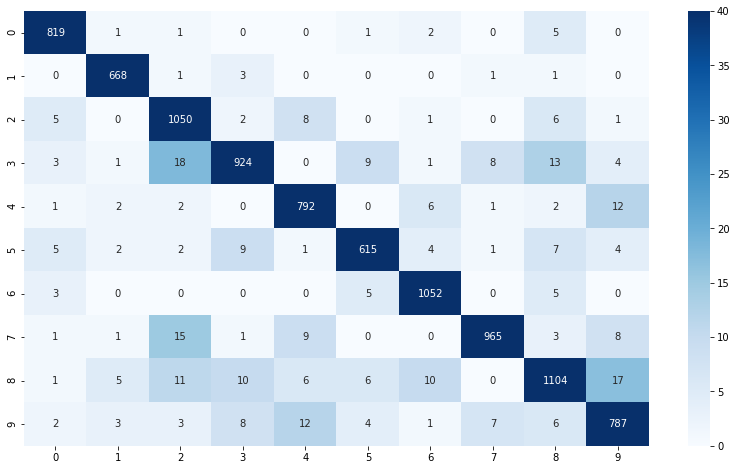

In [34]:
#テストデータy_validが縦軸、予測値y_rndforest_valid_predictionsが横軸
plt.figure(figsize=(14, 8))
sns.heatmap(matrix_rndforest_valid, annot=True, fmt='g', cmap='Blues', vmin=0, vmax=40)
plt.show()

# 2モデルの比較(ロジスティック回帰とRandomForest)

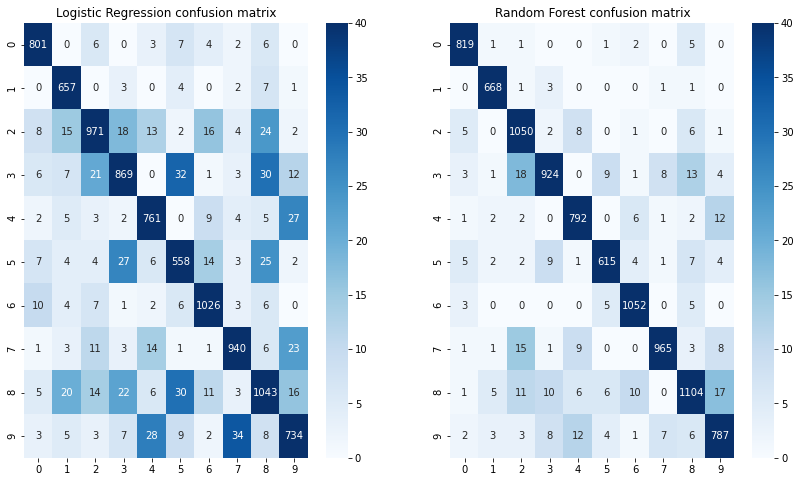

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(14, 8))

map_min, map_max = 0, 40

sns.heatmap(matrix_logireg_valid, annot=True, fmt='g', cmap='Blues', vmin=map_min, vmax=map_max, ax=axs[0])
sns.heatmap(matrix_rndforest_valid, annot=True, fmt='g', cmap='Blues', vmin=map_min, vmax=map_max, ax=axs[1])

axs[0].set_title("Logistic Regression confusion matrix")
axs[1].set_title("Random Forest confusion matrix")
plt.show()

予測が的中した件数はRandomForestの方が多い

# 6.再調整

# 6-1. グリッドサーチの総当たりの範囲

In [36]:
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import(f1_score, make_scorer)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
npz = np.load('C:/my_comp_train_XY/my_comp_train_XY.npz')
X_raw = npz['X']
y_raw = npz['y']

In [38]:
X_train_adj, X_valid_adj, y_train_adj, y_valid_adj = train_test_split(X_raw, y_raw,
                                                      shuffle=True, test_size=0.20, stratify=y_raw)
print("Train data shape, X_train.shape:{} y_train.shape:{}".format(X_train_adj.shape, y_train_adj.shape))
print("Train data shape, X_valid.shape:{} y_valid.shape:{}".format(X_valid_adj.shape, y_valid_adj.shape))

Train data shape, X_train.shape:(36381, 28, 28) y_train.shape:(36381,)
Train data shape, X_valid.shape:(9096, 28, 28) y_valid.shape:(9096,)


In [39]:
X_train = (X_train_adj/255.).reshape(-1, 28*28)
X_valid = (X_valid_adj/255.).reshape(-1, 28*28)
y_train = y_train_adj.copy().reshape(-1, 1)
y_valid = y_valid_adj.copy().reshape(-1, 1)

In [40]:
logireg = LogisticRegression()

param_grid = {
    "penalty":["none", "l2"],
    "C":[0.0, 0.01, 0.1, 0.3, 0.5, 0.7, 1.0, 1.5],
}

scoring = {
    "accuracy": make_scorer(accuracy_score),
    "recall": make_scorer(recall_score, average="micro"),
    "precision": make_scorer(precision_score, average="micro"), 
    "f1": make_scorer(f1_score, average="micro"),
}

#Closs Validationの分割数(デフォルト値は3)
cv = 5
#最良だったパラメタを使って学習データ全体で再学習するかどうか
refit = False
#トレーニングスコアを含むかどうか
return_train_score = True
#ログ出力レベル
verbose = 3

In [41]:
grid_search_v1 = GridSearchCV(
    logireg,
    param_grid,
    scoring=scoring,
    cv=cv,
    refit=refit, 
    return_train_score=return_train_score,
    verbose=verbose)

In [42]:
grid_search_v1.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.0, penalty=none .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i =

[CV]  C=0.0, penalty=none, accuracy=(train=0.943, test=0.909), f1=(train=0.943, test=0.909), precision=(train=0.943, test=0.909), recall=(train=0.943, test=0.909), total=  17.0s
[CV] C=0.0, penalty=none .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.1s remaining:    0.0s
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

[CV]  C=0.0, penalty=none, accuracy=(train=0.943, test=0.916), f1=(train=0.943, test=0.916), precision=(train=0.943, test=0.916), recall=(train=0.943, test=0.916), total=  16.2s
[CV] C=0.0, penalty=none .............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   33.5s remaining:    0.0s
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

[CV]  C=0.0, penalty=none, accuracy=(train=0.943, test=0.914), f1=(train=0.943, test=0.914), precision=(train=0.943, test=0.914), recall=(train=0.943, test=0.914), total=  14.7s
[CV] C=0.0, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.0, penalty=none, accuracy=(train=0.943, test=0.908), f1=(train=0.943, test=0.908), precision=(train=0.943, test=0.908), recall=(train=0.943, test=0.908), total=  14.0s
[CV] C=0.0, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.0, penalty=none, accuracy=(train=0.942, test=0.920), f1=(train=0.942, test=0.920), precision=(train=0.942, test=0.920), recall=(train=0.942, test=0.920), total=  14.1s
[CV] C=0.0, penalty=l2 ...............................................
[CV]  C=0.0, penalty=l2, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\takay\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\User

[CV]  C=0.0, penalty=l2, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.2s
[CV] C=0.0, penalty=l2 ...............................................
[CV]  C=0.0, penalty=l2, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1407, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\takay\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\User

[CV]  C=0.0, penalty=l2, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.0, penalty=l2 ...............................................
[CV]  C=0.0, penalty=l2, accuracy=(train=nan, test=nan), f1=(train=nan, test=nan), precision=(train=nan, test=nan), recall=(train=nan, test=nan), total=   0.1s
[CV] C=0.01, penalty=none ............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, penalty=none, accuracy=(train=0.943, test=0.909), f1=(train=0.943, test=0.909), precision=(train=0.943, test=0.909), recall=(train=0.943, test=0.909), total=  13.6s
[CV] C=0.01, penalty=none ............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, penalty=none, accuracy=(train=0.943, test=0.916), f1=(train=0.943, test=0.916), precision=(train=0.943, test=0.916), recall=(train=0.943, test=0.916), total=  13.7s
[CV] C=0.01, penalty=none ............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, penalty=none, accuracy=(train=0.943, test=0.914), f1=(train=0.943, test=0.914), precision=(train=0.943, test=0.914), recall=(train=0.943, test=0.914), total=  14.4s
[CV] C=0.01, penalty=none ............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, penalty=none, accuracy=(train=0.943, test=0.908), f1=(train=0.943, test=0.908), precision=(train=0.943, test=0.908), recall=(train=0.943, test=0.908), total=  13.9s
[CV] C=0.01, penalty=none ............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, penalty=none, accuracy=(train=0.942, test=0.920), f1=(train=0.942, test=0.920), precision=(train=0.942, test=0.920), recall=(train=0.942, test=0.920), total=  13.9s
[CV] C=0.01, penalty=l2 ..............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, penalty=l2, accuracy=(train=0.915, test=0.910), f1=(train=0.915, test=0.910), precision=(train=0.915, test=0.910), recall=(train=0.915, test=0.910), total=  13.4s
[CV] C=0.01, penalty=l2 ..............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, penalty=l2, accuracy=(train=0.914, test=0.909), f1=(train=0.914, test=0.909), precision=(train=0.914, test=0.909), recall=(train=0.914, test=0.909), total=  14.1s
[CV] C=0.01, penalty=l2 ..............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, penalty=l2, accuracy=(train=0.915, test=0.907), f1=(train=0.915, test=0.907), precision=(train=0.915, test=0.907), recall=(train=0.915, test=0.907), total=  14.0s
[CV] C=0.01, penalty=l2 ..............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, penalty=l2, accuracy=(train=0.915, test=0.906), f1=(train=0.915, test=0.906), precision=(train=0.915, test=0.906), recall=(train=0.915, test=0.906), total=  13.8s
[CV] C=0.01, penalty=l2 ..............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.01, penalty=l2, accuracy=(train=0.913, test=0.910), f1=(train=0.913, test=0.910), precision=(train=0.913, test=0.910), recall=(train=0.913, test=0.910), total=  14.0s
[CV] C=0.1, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=none, accuracy=(train=0.943, test=0.909), f1=(train=0.943, test=0.909), precision=(train=0.943, test=0.909), recall=(train=0.943, test=0.909), total=  13.6s
[CV] C=0.1, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=none, accuracy=(train=0.943, test=0.916), f1=(train=0.943, test=0.916), precision=(train=0.943, test=0.916), recall=(train=0.943, test=0.916), total=  13.8s
[CV] C=0.1, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=none, accuracy=(train=0.943, test=0.914), f1=(train=0.943, test=0.914), precision=(train=0.943, test=0.914), recall=(train=0.943, test=0.914), total=  14.4s
[CV] C=0.1, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=none, accuracy=(train=0.943, test=0.908), f1=(train=0.943, test=0.908), precision=(train=0.943, test=0.908), recall=(train=0.943, test=0.908), total=  14.0s
[CV] C=0.1, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=none, accuracy=(train=0.942, test=0.920), f1=(train=0.942, test=0.920), precision=(train=0.942, test=0.920), recall=(train=0.942, test=0.920), total=  14.0s
[CV] C=0.1, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=l2, accuracy=(train=0.933, test=0.916), f1=(train=0.933, test=0.916), precision=(train=0.933, test=0.916), recall=(train=0.933, test=0.916), total=  14.1s
[CV] C=0.1, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=l2, accuracy=(train=0.933, test=0.920), f1=(train=0.933, test=0.920), precision=(train=0.933, test=0.920), recall=(train=0.933, test=0.920), total=  14.1s
[CV] C=0.1, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=l2, accuracy=(train=0.933, test=0.918), f1=(train=0.933, test=0.918), precision=(train=0.933, test=0.918), recall=(train=0.933, test=0.918), total=  14.7s
[CV] C=0.1, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=l2, accuracy=(train=0.934, test=0.913), f1=(train=0.934, test=0.913), precision=(train=0.934, test=0.913), recall=(train=0.934, test=0.913), total=  15.8s
[CV] C=0.1, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=l2, accuracy=(train=0.932, test=0.922), f1=(train=0.932, test=0.922), precision=(train=0.932, test=0.922), recall=(train=0.932, test=0.922), total=  14.0s
[CV] C=0.3, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.3, penalty=none, accuracy=(train=0.943, test=0.909), f1=(train=0.943, test=0.909), precision=(train=0.943, test=0.909), recall=(train=0.943, test=0.909), total=  13.8s
[CV] C=0.3, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.3, penalty=none, accuracy=(train=0.943, test=0.916), f1=(train=0.943, test=0.916), precision=(train=0.943, test=0.916), recall=(train=0.943, test=0.916), total=  14.0s
[CV] C=0.3, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.3, penalty=none, accuracy=(train=0.943, test=0.914), f1=(train=0.943, test=0.914), precision=(train=0.943, test=0.914), recall=(train=0.943, test=0.914), total=  14.8s
[CV] C=0.3, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.3, penalty=none, accuracy=(train=0.943, test=0.908), f1=(train=0.943, test=0.908), precision=(train=0.943, test=0.908), recall=(train=0.943, test=0.908), total=  14.1s
[CV] C=0.3, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.3, penalty=none, accuracy=(train=0.942, test=0.920), f1=(train=0.942, test=0.920), precision=(train=0.942, test=0.920), recall=(train=0.942, test=0.920), total=  14.3s
[CV] C=0.3, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.3, penalty=l2, accuracy=(train=0.939, test=0.914), f1=(train=0.939, test=0.914), precision=(train=0.939, test=0.914), recall=(train=0.939, test=0.914), total=  14.2s
[CV] C=0.3, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.3, penalty=l2, accuracy=(train=0.939, test=0.920), f1=(train=0.939, test=0.920), precision=(train=0.939, test=0.920), recall=(train=0.939, test=0.920), total=  15.1s
[CV] C=0.3, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.3, penalty=l2, accuracy=(train=0.939, test=0.918), f1=(train=0.939, test=0.918), precision=(train=0.939, test=0.918), recall=(train=0.939, test=0.918), total=  15.2s
[CV] C=0.3, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.3, penalty=l2, accuracy=(train=0.940, test=0.914), f1=(train=0.940, test=0.914), precision=(train=0.940, test=0.914), recall=(train=0.940, test=0.914), total=  14.9s
[CV] C=0.3, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.3, penalty=l2, accuracy=(train=0.938, test=0.923), f1=(train=0.938, test=0.923), precision=(train=0.938, test=0.923), recall=(train=0.938, test=0.923), total=  13.9s
[CV] C=0.5, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=none, accuracy=(train=0.943, test=0.909), f1=(train=0.943, test=0.909), precision=(train=0.943, test=0.909), recall=(train=0.943, test=0.909), total=  13.8s
[CV] C=0.5, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=none, accuracy=(train=0.943, test=0.916), f1=(train=0.943, test=0.916), precision=(train=0.943, test=0.916), recall=(train=0.943, test=0.916), total=  14.0s
[CV] C=0.5, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=none, accuracy=(train=0.943, test=0.914), f1=(train=0.943, test=0.914), precision=(train=0.943, test=0.914), recall=(train=0.943, test=0.914), total=  15.3s
[CV] C=0.5, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=none, accuracy=(train=0.943, test=0.908), f1=(train=0.943, test=0.908), precision=(train=0.943, test=0.908), recall=(train=0.943, test=0.908), total=  15.6s
[CV] C=0.5, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=none, accuracy=(train=0.942, test=0.920), f1=(train=0.942, test=0.920), precision=(train=0.942, test=0.920), recall=(train=0.942, test=0.920), total=  15.1s
[CV] C=0.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=l2, accuracy=(train=0.941, test=0.914), f1=(train=0.941, test=0.914), precision=(train=0.941, test=0.914), recall=(train=0.941, test=0.914), total=  15.7s
[CV] C=0.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=l2, accuracy=(train=0.941, test=0.920), f1=(train=0.941, test=0.920), precision=(train=0.941, test=0.920), recall=(train=0.941, test=0.920), total=  15.8s
[CV] C=0.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=l2, accuracy=(train=0.941, test=0.917), f1=(train=0.941, test=0.917), precision=(train=0.941, test=0.917), recall=(train=0.941, test=0.917), total=  15.4s
[CV] C=0.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=l2, accuracy=(train=0.941, test=0.912), f1=(train=0.941, test=0.912), precision=(train=0.941, test=0.912), recall=(train=0.941, test=0.912), total=  16.6s
[CV] C=0.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=l2, accuracy=(train=0.941, test=0.923), f1=(train=0.941, test=0.923), precision=(train=0.941, test=0.923), recall=(train=0.941, test=0.923), total=  16.2s
[CV] C=0.7, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.7, penalty=none, accuracy=(train=0.943, test=0.909), f1=(train=0.943, test=0.909), precision=(train=0.943, test=0.909), recall=(train=0.943, test=0.909), total=  16.5s
[CV] C=0.7, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.7, penalty=none, accuracy=(train=0.943, test=0.916), f1=(train=0.943, test=0.916), precision=(train=0.943, test=0.916), recall=(train=0.943, test=0.916), total=  15.7s
[CV] C=0.7, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.7, penalty=none, accuracy=(train=0.943, test=0.914), f1=(train=0.943, test=0.914), precision=(train=0.943, test=0.914), recall=(train=0.943, test=0.914), total=  15.9s
[CV] C=0.7, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.7, penalty=none, accuracy=(train=0.943, test=0.908), f1=(train=0.943, test=0.908), precision=(train=0.943, test=0.908), recall=(train=0.943, test=0.908), total=  15.2s
[CV] C=0.7, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.7, penalty=none, accuracy=(train=0.942, test=0.920), f1=(train=0.942, test=0.920), precision=(train=0.942, test=0.920), recall=(train=0.942, test=0.920), total=  15.2s
[CV] C=0.7, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.7, penalty=l2, accuracy=(train=0.941, test=0.915), f1=(train=0.941, test=0.915), precision=(train=0.941, test=0.915), recall=(train=0.941, test=0.915), total=  15.0s
[CV] C=0.7, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.7, penalty=l2, accuracy=(train=0.941, test=0.919), f1=(train=0.941, test=0.919), precision=(train=0.941, test=0.919), recall=(train=0.941, test=0.919), total=  15.4s
[CV] C=0.7, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.7, penalty=l2, accuracy=(train=0.942, test=0.916), f1=(train=0.942, test=0.916), precision=(train=0.942, test=0.916), recall=(train=0.942, test=0.916), total=  14.5s
[CV] C=0.7, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.7, penalty=l2, accuracy=(train=0.942, test=0.912), f1=(train=0.942, test=0.912), precision=(train=0.942, test=0.912), recall=(train=0.942, test=0.912), total=  14.0s
[CV] C=0.7, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.7, penalty=l2, accuracy=(train=0.941, test=0.922), f1=(train=0.941, test=0.922), precision=(train=0.941, test=0.922), recall=(train=0.941, test=0.922), total=  14.2s
[CV] C=1.0, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=none, accuracy=(train=0.943, test=0.909), f1=(train=0.943, test=0.909), precision=(train=0.943, test=0.909), recall=(train=0.943, test=0.909), total=  13.9s
[CV] C=1.0, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=none, accuracy=(train=0.943, test=0.916), f1=(train=0.943, test=0.916), precision=(train=0.943, test=0.916), recall=(train=0.943, test=0.916), total=  14.4s
[CV] C=1.0, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=none, accuracy=(train=0.943, test=0.914), f1=(train=0.943, test=0.914), precision=(train=0.943, test=0.914), recall=(train=0.943, test=0.914), total=  15.2s
[CV] C=1.0, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=none, accuracy=(train=0.943, test=0.908), f1=(train=0.943, test=0.908), precision=(train=0.943, test=0.908), recall=(train=0.943, test=0.908), total=  15.4s
[CV] C=1.0, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=none, accuracy=(train=0.942, test=0.920), f1=(train=0.942, test=0.920), precision=(train=0.942, test=0.920), recall=(train=0.942, test=0.920), total=  14.3s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=l2, accuracy=(train=0.942, test=0.913), f1=(train=0.942, test=0.913), precision=(train=0.942, test=0.913), recall=(train=0.942, test=0.913), total=  14.7s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=l2, accuracy=(train=0.942, test=0.918), f1=(train=0.942, test=0.918), precision=(train=0.942, test=0.918), recall=(train=0.942, test=0.918), total=  14.0s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=l2, accuracy=(train=0.942, test=0.917), f1=(train=0.942, test=0.917), precision=(train=0.942, test=0.917), recall=(train=0.942, test=0.917), total=  14.4s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=l2, accuracy=(train=0.942, test=0.912), f1=(train=0.942, test=0.912), precision=(train=0.942, test=0.912), recall=(train=0.942, test=0.912), total=  14.7s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=l2, accuracy=(train=0.941, test=0.922), f1=(train=0.941, test=0.922), precision=(train=0.941, test=0.922), recall=(train=0.941, test=0.922), total=  15.5s
[CV] C=1.5, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.5, penalty=none, accuracy=(train=0.943, test=0.909), f1=(train=0.943, test=0.909), precision=(train=0.943, test=0.909), recall=(train=0.943, test=0.909), total=  14.0s
[CV] C=1.5, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.5, penalty=none, accuracy=(train=0.943, test=0.916), f1=(train=0.943, test=0.916), precision=(train=0.943, test=0.916), recall=(train=0.943, test=0.916), total=  13.9s
[CV] C=1.5, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.5, penalty=none, accuracy=(train=0.943, test=0.914), f1=(train=0.943, test=0.914), precision=(train=0.943, test=0.914), recall=(train=0.943, test=0.914), total=  14.8s
[CV] C=1.5, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.5, penalty=none, accuracy=(train=0.943, test=0.908), f1=(train=0.943, test=0.908), precision=(train=0.943, test=0.908), recall=(train=0.943, test=0.908), total=  14.3s
[CV] C=1.5, penalty=none .............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.5, penalty=none, accuracy=(train=0.942, test=0.920), f1=(train=0.942, test=0.920), precision=(train=0.942, test=0.920), recall=(train=0.942, test=0.920), total=  14.7s
[CV] C=1.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.5, penalty=l2, accuracy=(train=0.942, test=0.914), f1=(train=0.942, test=0.914), precision=(train=0.942, test=0.914), recall=(train=0.942, test=0.914), total=  14.2s
[CV] C=1.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.5, penalty=l2, accuracy=(train=0.942, test=0.917), f1=(train=0.942, test=0.917), precision=(train=0.942, test=0.917), recall=(train=0.942, test=0.917), total=  14.1s
[CV] C=1.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.5, penalty=l2, accuracy=(train=0.942, test=0.916), f1=(train=0.942, test=0.916), precision=(train=0.942, test=0.916), recall=(train=0.942, test=0.916), total=  15.0s
[CV] C=1.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.5, penalty=l2, accuracy=(train=0.942, test=0.910), f1=(train=0.942, test=0.910), precision=(train=0.942, test=0.910), recall=(train=0.942, test=0.910), total=  15.0s
[CV] C=1.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.5, penalty=l2, accuracy=(train=0.942, test=0.921), f1=(train=0.942, test=0.921), precision=(train=0.942, test=0.921), recall=(train=0.942, test=0.921), total=  14.0s


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 18.5min finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0, 0.01, 0.1, 0.3, 0.5, 0.7, 1.0, 1.5],
                         'penalty': ['none', 'l2']},
             refit=False, return_train_score=True,
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score, average=micro),
                      'precision': make_scorer(precision_score, average=micro),
                      'recall': make_scorer(recall_score, average=micro)},
             verbose=3)

In [43]:
grid_search_v1.cv_results_

{'mean_fit_time': array([15.15799789,  0.11885719, 13.86628776, 13.81758647, 13.92229528,
        14.50255294, 14.17410002, 14.62732234, 14.72274547, 15.89000983,
        15.65480766, 14.57562532, 14.64009228, 14.63212485, 14.29908438,
        14.39137115]),
 'std_fit_time': array([1.19932645, 0.0262379 , 0.28216727, 0.24393817, 0.27182355,
        0.69246982, 0.3575471 , 0.52008749, 0.72866914, 0.43898062,
        0.48506261, 0.54502639, 0.56261508, 0.49592052, 0.33809529,
        0.45044693]),
 'mean_score_time': array([0.04123225, 0.        , 0.03447633, 0.03228192, 0.03226328,
        0.03288984, 0.03312235, 0.03643818, 0.02361526, 0.0375989 ,
        0.03698921, 0.03510208, 0.03573842, 0.02530179, 0.03023024,
        0.03839469]),
 'std_score_time': array([0.01066611, 0.        , 0.0019751 , 0.0082552 , 0.00390595,
        0.00743594, 0.00644838, 0.00470489, 0.00375352, 0.00636935,
        0.00589835, 0.00900657, 0.00547818, 0.00517183, 0.00708927,
        0.00909621]),
 'param_C'

In [44]:
params = grid_search_v1.cv_results_['params']
accuracy_list = grid_search_v1.cv_results_['mean_test_accuracy']

result_list = []
for param, accuracy in zip(params, accuracy_list):
    param["test_acc"] = accuracy
    result_list.append(param)

In [45]:
result_list

[{'C': 0.0, 'penalty': 'none', 'test_acc': 0.9133614928249993},
 {'C': 0.0, 'penalty': 'l2', 'test_acc': nan},
 {'C': 0.01, 'penalty': 'none', 'test_acc': 0.9133614928249993},
 {'C': 0.01, 'penalty': 'l2', 'test_acc': 0.9084411880669915},
 {'C': 0.1, 'penalty': 'none', 'test_acc': 0.9133614928249993},
 {'C': 0.1, 'penalty': 'l2', 'test_acc': 0.9177868162569938},
 {'C': 0.3, 'penalty': 'none', 'test_acc': 0.9133614928249993},
 {'C': 0.3, 'penalty': 'l2', 'test_acc': 0.9179242997377852},
 {'C': 0.5, 'penalty': 'none', 'test_acc': 0.9133614928249993},
 {'C': 0.5, 'penalty': 'l2', 'test_acc': 0.9170446917823355},
 {'C': 0.7, 'penalty': 'none', 'test_acc': 0.9133614928249993},
 {'C': 0.7, 'penalty': 'l2', 'test_acc': 0.9168797395576277},
 {'C': 1.0, 'penalty': 'none', 'test_acc': 0.9133614928249993},
 {'C': 1.0, 'penalty': 'l2', 'test_acc': 0.916302548421027},
 {'C': 1.5, 'penalty': 'none', 'test_acc': 0.9133614928249993},
 {'C': 1.5, 'penalty': 'l2', 'test_acc': 0.9155053958026157}]

In [46]:
df_result_v1 = pd.DataFrame(result_list)

In [47]:
df_result_v1

,C,penalty,test_acc
0,0.00,none,0.913361
1,0.00,l2,NaN
2,0.01,none,0.913361
3,0.01,l2,0.908441
4,0.10,none,0.913361
5,0.10,l2,0.917787
6,0.30,none,0.913361
7,0.30,l2,0.917924
8,0.50,none,0.913361
9,0.50,l2,0.917045


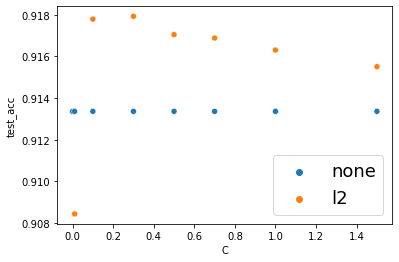

In [48]:
sns.scatterplot(data=df_result_v1, x="C", y="test_acc", hue="penalty")
plt.legend(loc= 'lower right', fontsize=18)
plt.show()

ロジスティック回帰では、C=0.30のとき精度が最も高いという結果が得られた。

# 6-2. データの拡張性を検討する

In [49]:
data_augmenter = ImageDataGenerator(
                    rotation_range = 15,
                    width_shift_range = 0.15,
                    height_shift_range = 0.15,
                    fill_mode = "constant")

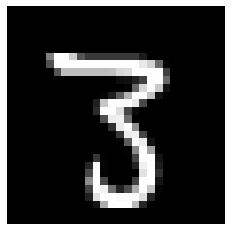

In [50]:
rnd_idx = np.random.randint(len(X_train_adj))
X_sample = X_train_adj[[rnd_idx]]
plt.imshow(X_sample[0], cmap="gray")
plt.axis('off')
plt.show()

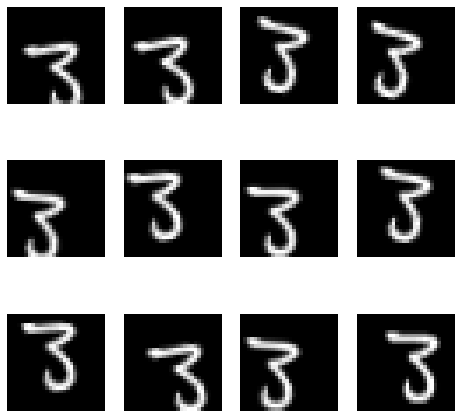

In [51]:
plt.figure(figsize=(8,8))
for i, X_batch in enumerate(data_augmenter.flow(X_sample[:,:,:,np.newaxis])):
    if i==12:
        break
    plt.subplot(3, 4,i+1)
    plt.imshow(X_batch[0,:,:,0], cmap="gray")
    plt.axis('off')
plt.show()

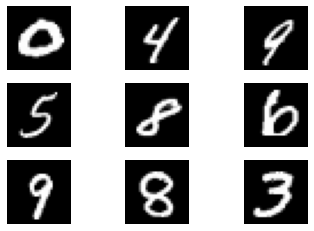

In [52]:
X_sample = X_train_adj[0:9]
for i, X in enumerate(X_sample):
    plt.subplot(3, 3, i+1)
    plt.imshow(X, cmap="gray")
    plt.axis('off')
plt.show()

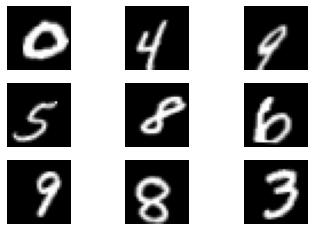

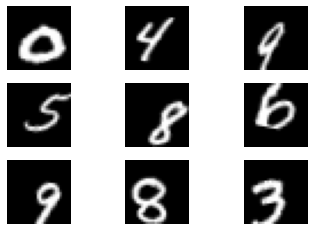

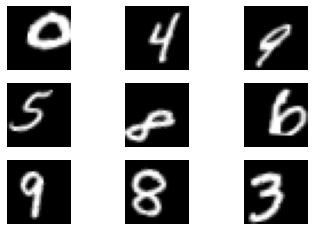

In [53]:
for i, X_batch in enumerate(data_augmenter.flow(X_sample[:,:,:,np.newaxis], shuffle=False, batch_size=12)):
    if i ==3:
        break
    for j, X in enumerate(X_batch):
        plt.subplot(3, 3, j+1)
        plt.imshow(X[:,:,0], cmap="gray")
        plt.axis('off')
    plt.show() 

In [54]:
#データの拡張の実行
X_train_augmented = X_train_adj[:,:,:,np.newaxis].copy()
y_train_augmented = y_train_adj.copy()

for i, (X_batch, y_batch) in enumerate(data_augmenter.flow(X_train_adj[:,:,:,np.newaxis], y_train_adj, batch_size=len(X_train_adj), shuffle=False)):
    if i==2:
        break
    #多次元配列の結合
    X_train_augmented = np.r_[X_train_augmented, X_batch]
    y_train_augmented = np.r_[y_train_augmented, y_batch]

In [55]:
print("X_train_augmented.shape:{}".format(X_train_augmented.shape))
print("y_train_augmented.shape:{}".format(y_train_augmented.shape))

X_train_augmented.shape:(109143, 28, 28, 1)
y_train_augmented.shape:(109143,)


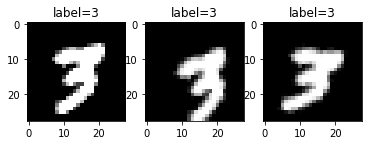

In [56]:
adj_img_num=len(X_train_adj)
rnd_idx = np.random.randint(adj_img_num)
group_idx = [adj_img_num*idx + rnd_idx for idx in range(3)]

for i, show_idx in enumerate(group_idx):
    plt.subplot(1, 3, i+1)
    plt.imshow(X_train_augmented[show_idx,:,:,0], cmap="gray")
    plt.title("label={}".format(y_train_augmented[show_idx]))
plt.show()

In [57]:
X_train_augscaled = (X_train_augmented/255.).reshape(-1, 28*28)
y_train_augscaled = y_train_augmented.copy().reshape(-1, 1)
print("X_train_augmented.shape:{}".format(X_train_augscaled.shape))
print("y_train_augmented.shape:{}".format(y_train_augscaled.shape))

X_train_augmented.shape:(109143, 784)
y_train_augmented.shape:(109143, 1)


In [58]:
#グリッドサーチ
logireg = LogisticRegression()

param_grid_2 = {
    "penalty":["l2"],
    "C":[0.1, 0.3, 0.5, 0.7, 1.0],
}

scoring = {"accuracy"}

cv = 5
refit = False
return_train_score = True
verbose = 3

In [59]:
grid_search_v2 = GridSearchCV(
    logireg,
    param_grid_2,
    scoring=scoring,
    cv=cv,
    refit=refit, 
    return_train_score=return_train_score,
    verbose=verbose)

In [60]:
grid_search_v2.fit(X_train_augscaled, y_train_augscaled)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.1, penalty=l2 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=l2, accuracy=(train=0.602, test=0.801), total=  48.3s
[CV] C=0.1, penalty=l2 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   48.9s remaining:    0.0s
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=l2, accuracy=(train=0.623, test=0.733), total=  48.5s
[CV] C=0.1, penalty=l2 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.6min remaining:    0.0s
C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=l2, accuracy=(train=0.677, test=0.525), total=  48.7s
[CV] C=0.1, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=l2, accuracy=(train=0.675, test=0.537), total=  47.9s
[CV] C=0.1, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.1, penalty=l2, accuracy=(train=0.678, test=0.528), total=  47.5s
[CV] C=0.3, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.3, penalty=l2, accuracy=(train=0.603, test=0.799), total=  46.4s
[CV] C=0.3, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.3, penalty=l2, accuracy=(train=0.625, test=0.733), total=  48.2s
[CV] C=0.3, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.3, penalty=l2, accuracy=(train=0.677, test=0.526), total=  47.4s
[CV] C=0.3, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.3, penalty=l2, accuracy=(train=0.675, test=0.538), total=  47.6s
[CV] C=0.3, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.3, penalty=l2, accuracy=(train=0.679, test=0.530), total=  47.2s
[CV] C=0.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=l2, accuracy=(train=0.603, test=0.797), total=  41.2s
[CV] C=0.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=l2, accuracy=(train=0.624, test=0.731), total=  39.6s
[CV] C=0.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=l2, accuracy=(train=0.677, test=0.525), total=  40.6s
[CV] C=0.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=l2, accuracy=(train=0.676, test=0.540), total=  39.8s
[CV] C=0.5, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.5, penalty=l2, accuracy=(train=0.679, test=0.531), total=  41.3s
[CV] C=0.7, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.7, penalty=l2, accuracy=(train=0.603, test=0.799), total=  43.0s
[CV] C=0.7, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.7, penalty=l2, accuracy=(train=0.625, test=0.732), total=  39.6s
[CV] C=0.7, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.7, penalty=l2, accuracy=(train=0.677, test=0.527), total=  40.7s
[CV] C=0.7, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.7, penalty=l2, accuracy=(train=0.676, test=0.540), total=  39.9s
[CV] C=0.7, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=0.7, penalty=l2, accuracy=(train=0.679, test=0.529), total=  41.0s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=l2, accuracy=(train=0.603, test=0.797), total=  39.7s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=l2, accuracy=(train=0.625, test=0.732), total=  39.2s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=l2, accuracy=(train=0.677, test=0.527), total=  40.2s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=l2, accuracy=(train=0.676, test=0.540), total=  39.2s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\takay\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\takay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV]  C=1.0, penalty=l2, accuracy=(train=0.678, test=0.530), total=  39.5s


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed: 18.3min finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.3, 0.5, 0.7, 1.0], 'penalty': ['l2']},
             refit=False, return_train_score=True, scoring={'accuracy'},
             verbose=3)

In [61]:
params = grid_search_v2.cv_results_['params']
accuracy_list = grid_search_v2.cv_results_['mean_test_accuracy']

result_list_v2 = []
for param, accuracy in zip(params, accuracy_list):
    param["test_acc"] = accuracy
    result_list_v2.append(param)

In [62]:
df_result_v2 = pd.DataFrame(result_list_v2)

In [63]:
df_result_v2

,C,penalty,test_acc
0,0.1,l2,0.624747
1,0.3,l2,0.625087
2,0.5,l2,0.624821
3,0.7,l2,0.625490
4,1.0,l2,0.625279


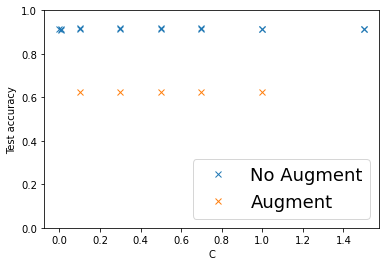

In [64]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.set_ylim([0, 1.0])
ax.set_xlabel("C")
ax.set_ylabel("Test accuracy")
ax.plot('C', 'test_acc', data=df_result_v1, label='No Augment', marker="x", linestyle="none")
ax.plot('C', 'test_acc', data=df_result_v2, label='Augment', marker="x", linestyle="none")

plt.legend(loc= 'lower right', fontsize=18)
plt.show()

データの拡張後、ロジスティック回帰では、C=0.70のとき精度が最も高いという結果が得られた。